In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import requests

In [2]:
def download_file(url):
    local_filename = url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    print(local_filename)

In [3]:
y = 2022
for m in range(1,13):
    path = f'https://data.gcoos.org/data/waf/nc_by_platform/{y}/ldn/gcoos_ioos-station-DISL-DISL_{y}_{m:02d}.nc'
    download_file(path)

gcoos_ioos-station-DISL-DISL_2022_01.nc
gcoos_ioos-station-DISL-DISL_2022_02.nc
gcoos_ioos-station-DISL-DISL_2022_03.nc
gcoos_ioos-station-DISL-DISL_2022_04.nc
gcoos_ioos-station-DISL-DISL_2022_05.nc
gcoos_ioos-station-DISL-DISL_2022_06.nc
gcoos_ioos-station-DISL-DISL_2022_07.nc
gcoos_ioos-station-DISL-DISL_2022_08.nc
gcoos_ioos-station-DISL-DISL_2022_09.nc
gcoos_ioos-station-DISL-DISL_2022_10.nc
gcoos_ioos-station-DISL-DISL_2022_11.nc
gcoos_ioos-station-DISL-DISL_2022_12.nc


In [4]:
datasets = []
for m in range(1,13):
    path = f'gcoos_ioos-station-DISL-DISL_{y}_{m:02d}.nc'
    ds = xr.open_dataset(path)
    ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
    sst = ds['sea_surface_temperature_1'].where(ds['sea_surface_temp_qc_1_agg']==1)
    sst.name = 'sst' #to simplify name
    datasets.append(sst)
ds_full = xr.merge(datasets)

C:\Users\sripr\AppData\Local\Temp\ipykernel_15744\2104580544.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
C:\Users\sripr\AppData\Local\Temp\ipykernel_15744\2104580544.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes['time'].to_datetimeindex() #this fixes dates to normal format
C:\Users\sripr\AppData\Local\Temp\ipykernel_15744\2104580544.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.D

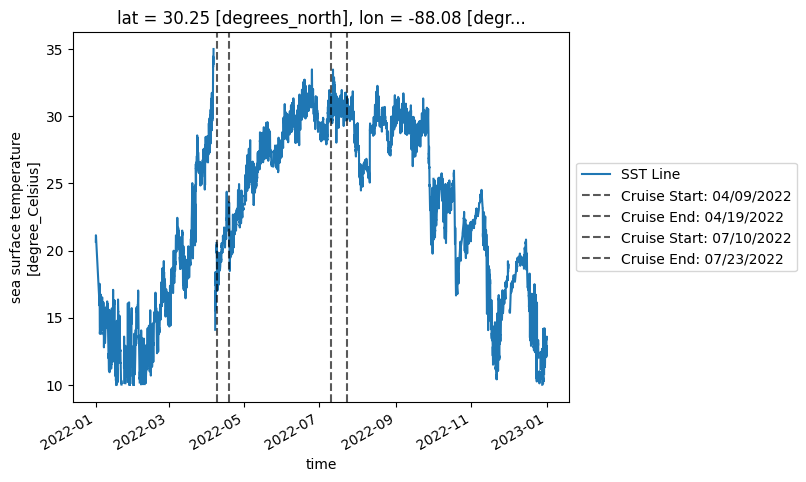

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()
ds_full.sst.plot(ax=ax, label='SST Line')

cruise_dates = {
    '2022-04-09': 'Cruise Start: 04/09/2022',
    '2022-04-19': 'Cruise End: 04/19/2022',
    '2022-07-10': 'Cruise Start: 07/10/2022',
    '2022-07-23': 'Cruise End: 07/23/2022'
}


for cruise_date, label_text in cruise_dates.items():
    ax.axvline(x=pd.to_datetime(cruise_date), color='black', linestyle='--', alpha=0.65, label=label_text)


ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


C:\Users\sripr\anaconda3\envs\my_satpy_env\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\sripr\anaconda3\envs\my_satpy_env\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


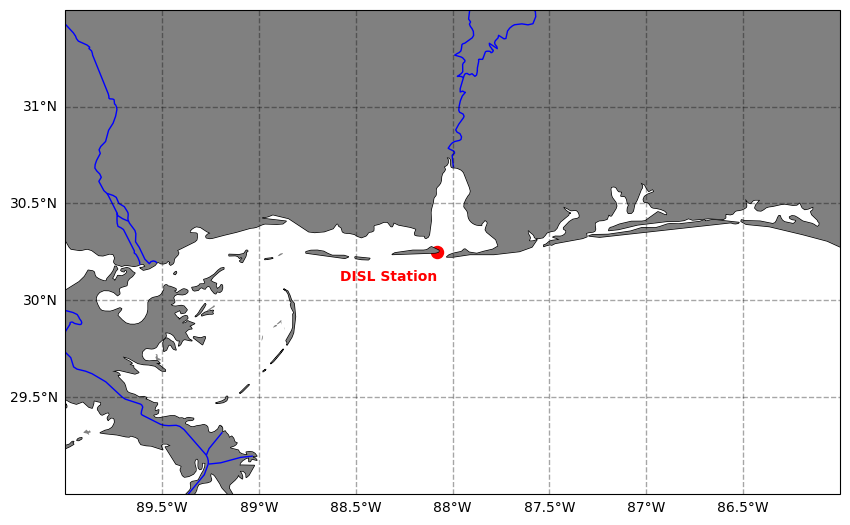

In [32]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())


ax.set_extent([-90,-86,29,31.5], crs=ccrs.PlateCarree())

ax.coastlines()

ax.add_feature(cfeature.LAND, facecolor='lightgray')

ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale='10m')) 
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                                scale='10m'))


ax.scatter(-88.077833,30.25075, marker='o', s=75, color="red")
ax.text(-88.077833, 30.1, "DISL Station", ha='right', fontsize=10, weight='bold', color='red')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', alpha=0.35, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False